<a href="https://colab.research.google.com/github/rafaelcamelo31/Introdu-o-a-Data-Science/blob/master/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando as notas em geral

In [0]:
import pandas as pd

ratings = pd.read_csv('ratings.csv')

ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
ratings.shape

(100836, 4)

In [0]:
print("Média", ratings.rating.mean())
print("Mediana", ratings.rating.median())

Média 3.501556983616962
Mediana 3.5


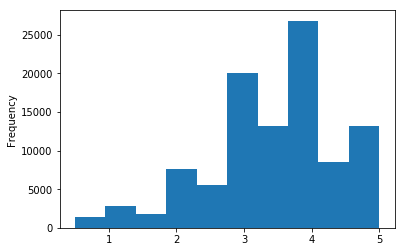

In [0]:
ratings.rating.plot(kind='hist')

In [0]:
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

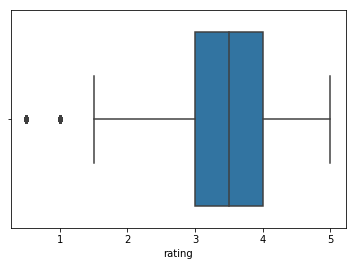

In [0]:
import seaborn as sns

sns.boxplot(ratings.rating)

#Olhando os Filmes

In [0]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando algumas notas especificas por filme

In [0]:
ratings.query('movieId==1').rating.mean()

3.9209302325581397

In [0]:
mean_movie_ratings = ratings.groupby('movieId').rating.mean()
mean_movie_ratings.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

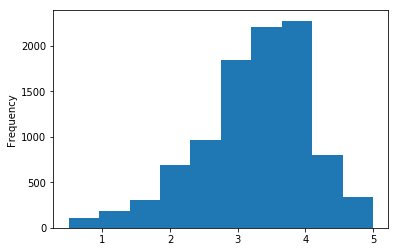

In [0]:
mean_movie_ratings.plot(kind = 'hist')

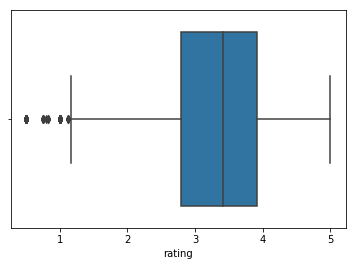

In [0]:
sns.boxplot(mean_movie_ratings)

In [0]:
mean_movie_ratings.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

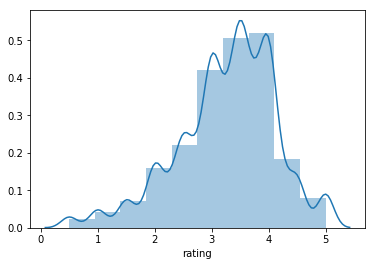

In [0]:
sns.distplot(mean_movie_ratings, bins=10)

Text(0.5, 1.0, 'Histograma das médias das notas do filme')

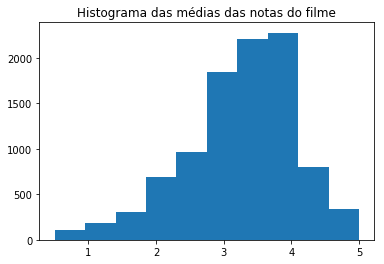

In [0]:
import matplotlib.pyplot as plt

plt.hist(mean_movie_ratings)
plt.title('Histograma das médias das notas do filme')

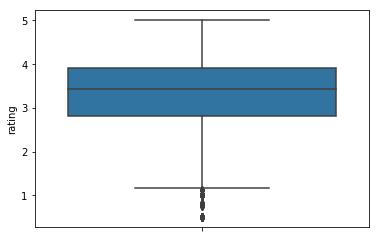

In [0]:
sns.boxplot(y=mean_movie_ratings)

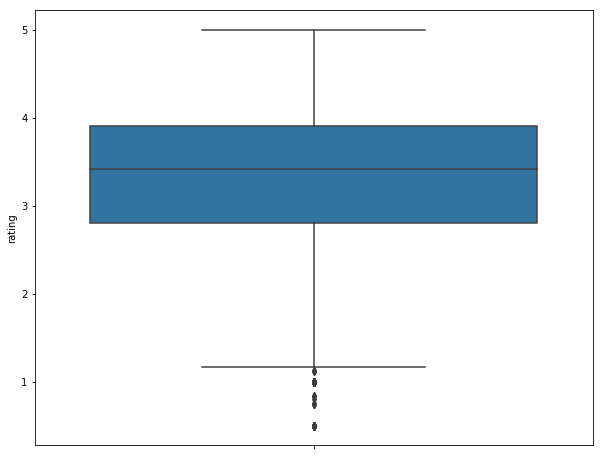

In [0]:
plt.figure(figsize = (10,8))
sns.boxplot(y = mean_movie_ratings)


#TMDB 5000 Movie Dataset

In [0]:
import pandas as pd

tmb = pd.read_csv('tmdb_5000_movies.csv')

tmb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
tmb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [0]:
contagem_de_lingua = tmb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


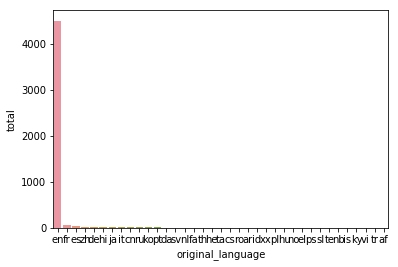

In [0]:
sns.barplot(x='original_language', y='total', data = contagem_de_lingua )

#Seaborn catplot()

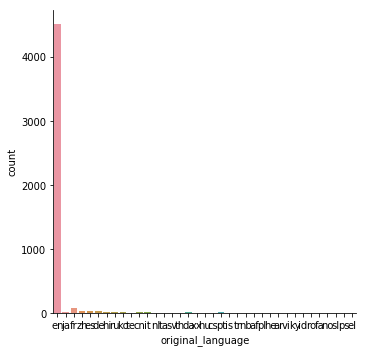

In [0]:
sns.catplot(x='original_language', kind='count', data=tmb)

#Matplotlib pie chart

([<matplotlib.patches.Wedge at 0x7f345b0ddb00>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

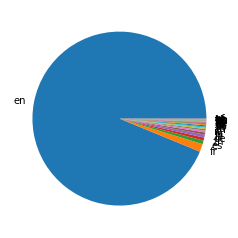

In [0]:
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

#Manipulando a visualização

In [0]:
total_por_lingua = tmb['original_language'].value_counts()

total_geral = total_por_lingua.sum()

total_ingles = total_por_lingua.loc['en']

total_do_resto = (total_geral - total_ingles)

print(total_ingles, total_do_resto)

4505 298


In [0]:
dados = {
    'lingua':['ingles','outros'],
    'total':[total_ingles, total_do_resto]
}

pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


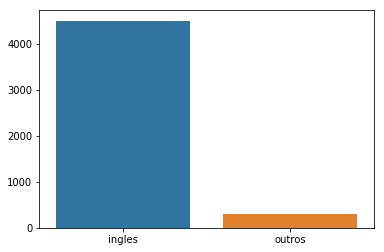

In [0]:
sns.barplot(x='lingua', y='total', data = dados)

In [0]:
total_outra_lingua = tmb.query("original_language != 'en'")
lingua_ordem = total_outra_lingua.original_language.value_counts().index

#Visualização de outras linguas

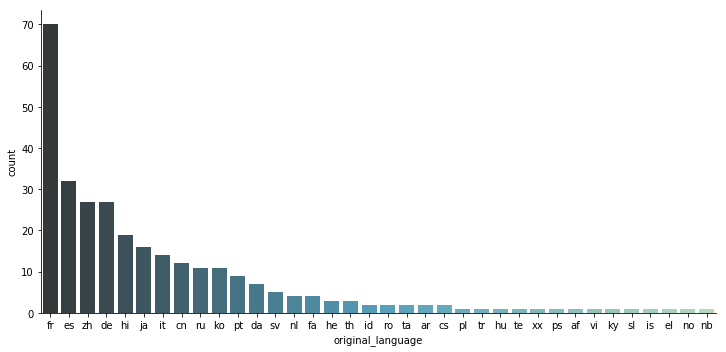

In [0]:
sns.catplot(x='original_language', kind='count', data = total_outra_lingua, aspect=2, order=lingua_ordem, palette='GnBu_d')

In [0]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [0]:
notas_toystory = ratings.query("movieId == '1'")
notas_jumanji = ratings.query("movieId =='2'")
print(len(notas_toystory), len(notas_jumanji))

215 110


In [0]:
print('Nota média do Toy Story %.2f'%notas_toystory.rating.mean())
print('Nota média do Jumanji %.2f'%notas_jumanji.rating.mean())

print(notas_toystory.rating.std(), notas_jumanji.rating.std())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43
0.8348591407114045 0.8817134921476455


In [0]:
print('Nota mediana do Toy Story %.2f'%notas_toystory.rating.median())
print('Nota mediana do Jumanji %.2f'%notas_jumanji.rating.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [0]:
import numpy as np

movie1 = np.append(np.array([2.5]*10),np.array([3.5]*10))
movie2 = np.append(np.array([5]*10),np.array([1]*10))

In [0]:
print(movie1.mean(),movie2.mean())
print(np.std(movie1),np.std(movie2))
print(np.median(movie1),np.median(movie2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

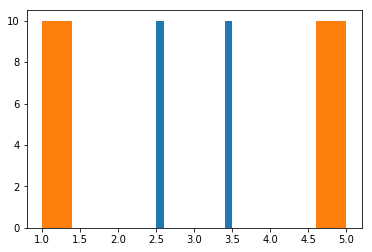

In [0]:
plt.hist(movie1)
plt.hist(movie2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f345ae6d240>,
 'caps': [<matplotlib.lines.Line2D at 0x7f345ae6da58>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f345ae7b470>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f345ae7b128>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f345ae6d390>,
  <matplotlib.lines.Line2D at 0x7f345ae7be48>]}

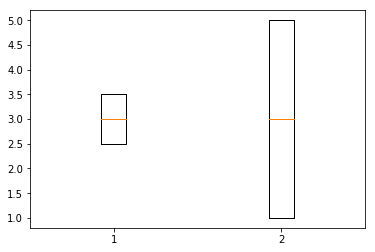

In [0]:
plt.boxplot([movie1,movie2])

{'boxes': [<matplotlib.lines.Line2D at 0x7f345addc550>],
 'caps': [<matplotlib.lines.Line2D at 0x7f345addcd68>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f345ade8780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f345ade8438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f345addc6a0>,
  <matplotlib.lines.Line2D at 0x7f345addca20>]}

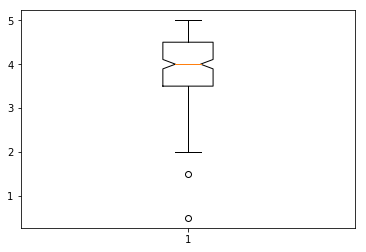

In [0]:
import matplotlib.pyplot as plt

plt.boxplot([notas_toystory.rating],[notas_jumanji.rating])

In [0]:
dados = {
    'movieId':[1,2],
    'rating':[notas_toystory.rating, notas_jumanji.rating]
}

dataframe = pd.DataFrame(dados)

dataframe

,movieId,rating
0,1,0 4.0 516 4.0 874 4.5 1434 ...
1,2,560 4.0 1026 4.0 1773 3.0 2275 ...


In [0]:
sns.boxplot(x='movieId', y='rating', data=notas_toystory.rating)

ValueError: ignored

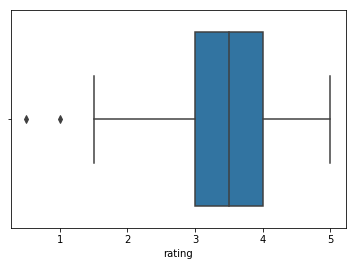

In [0]:
sns.boxplot(notas_jumanji.rating)